<a href="https://colab.research.google.com/github/msaluck/lab-practice-ml-20232024-1/blob/main/3_PrivateCreditDefaultPrediction_H1A021058.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Use pd.read_csv to read the dataset (assuming it's in the current directory)
data = pd.read_csv('./credit.csv')

# View all data
data

,Cust_No,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,2,0,1.0,330621,1,55,40.0,71.0,1.0,0,...,1,0,2,1,1,1,0,0,0,0
1,4,0,1.0,330621,0,40,99.0,90.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,1.0,330621,1,45,20.0,71.0,1.0,0,...,1,23,3,1,2,2,0,0,0,0
3,7,0,NaN,330421,0,32,20.0,21.0,1.0,0,...,1,1,3,1,1,1,0,0,0,0
4,8,0,1.0,330621,0,46,20.0,71.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,6455,0,1.0,330621,1,36,20.0,71.0,1.0,0,...,1,406,6,2,3,3,0,0,0,0
5914,6456,0,NaN,342423,0,41,NaN,90.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
5915,6458,0,1.0,330621,1,52,20.0,90.0,1.0,0,...,1,105,1,1,1,1,0,0,0,0
5916,6459,0,1.0,330621,0,32,10.0,31.0,1.0,68625,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# View the first 10 rows of data
data.head(10)

,Cust_No,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,2,0,1.0,330621,1,55,40.0,71.0,1.0,0,...,1,0,2,1,1,1,0,0,0,0
1,4,0,1.0,330621,0,40,99.0,90.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,1.0,330621,1,45,20.0,71.0,1.0,0,...,1,23,3,1,2,2,0,0,0,0
3,7,0,NaN,330421,0,32,20.0,21.0,1.0,0,...,1,1,3,1,1,1,0,0,0,0
4,8,0,1.0,330621,0,46,20.0,71.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,1.0,330621,0,35,20.0,31.0,1.0,68624,...,0,0,0,0,20,2,0,0,0,0
6,10,0,1.0,330621,1,46,20.0,71.0,1.0,68624,...,2,519,3,1,1,1,0,0,0,0
7,11,1,1.0,330621,0,39,99.0,31.0,1.0,0,...,9,23698,9,2,11,4,3,10918,9,4
8,13,0,1.0,330621,1,54,20.0,61.0,2.0,68619,...,0,0,0,0,7,4,0,0,0,0
9,14,0,1.0,330621,1,45,20.0,71.0,1.0,68631,...,3,6379,33,1,1,1,2,4582,3,1


In [ ]:
# View the length and width of data in the matrix format
data.shape

(5918, 32)

<Axes: >

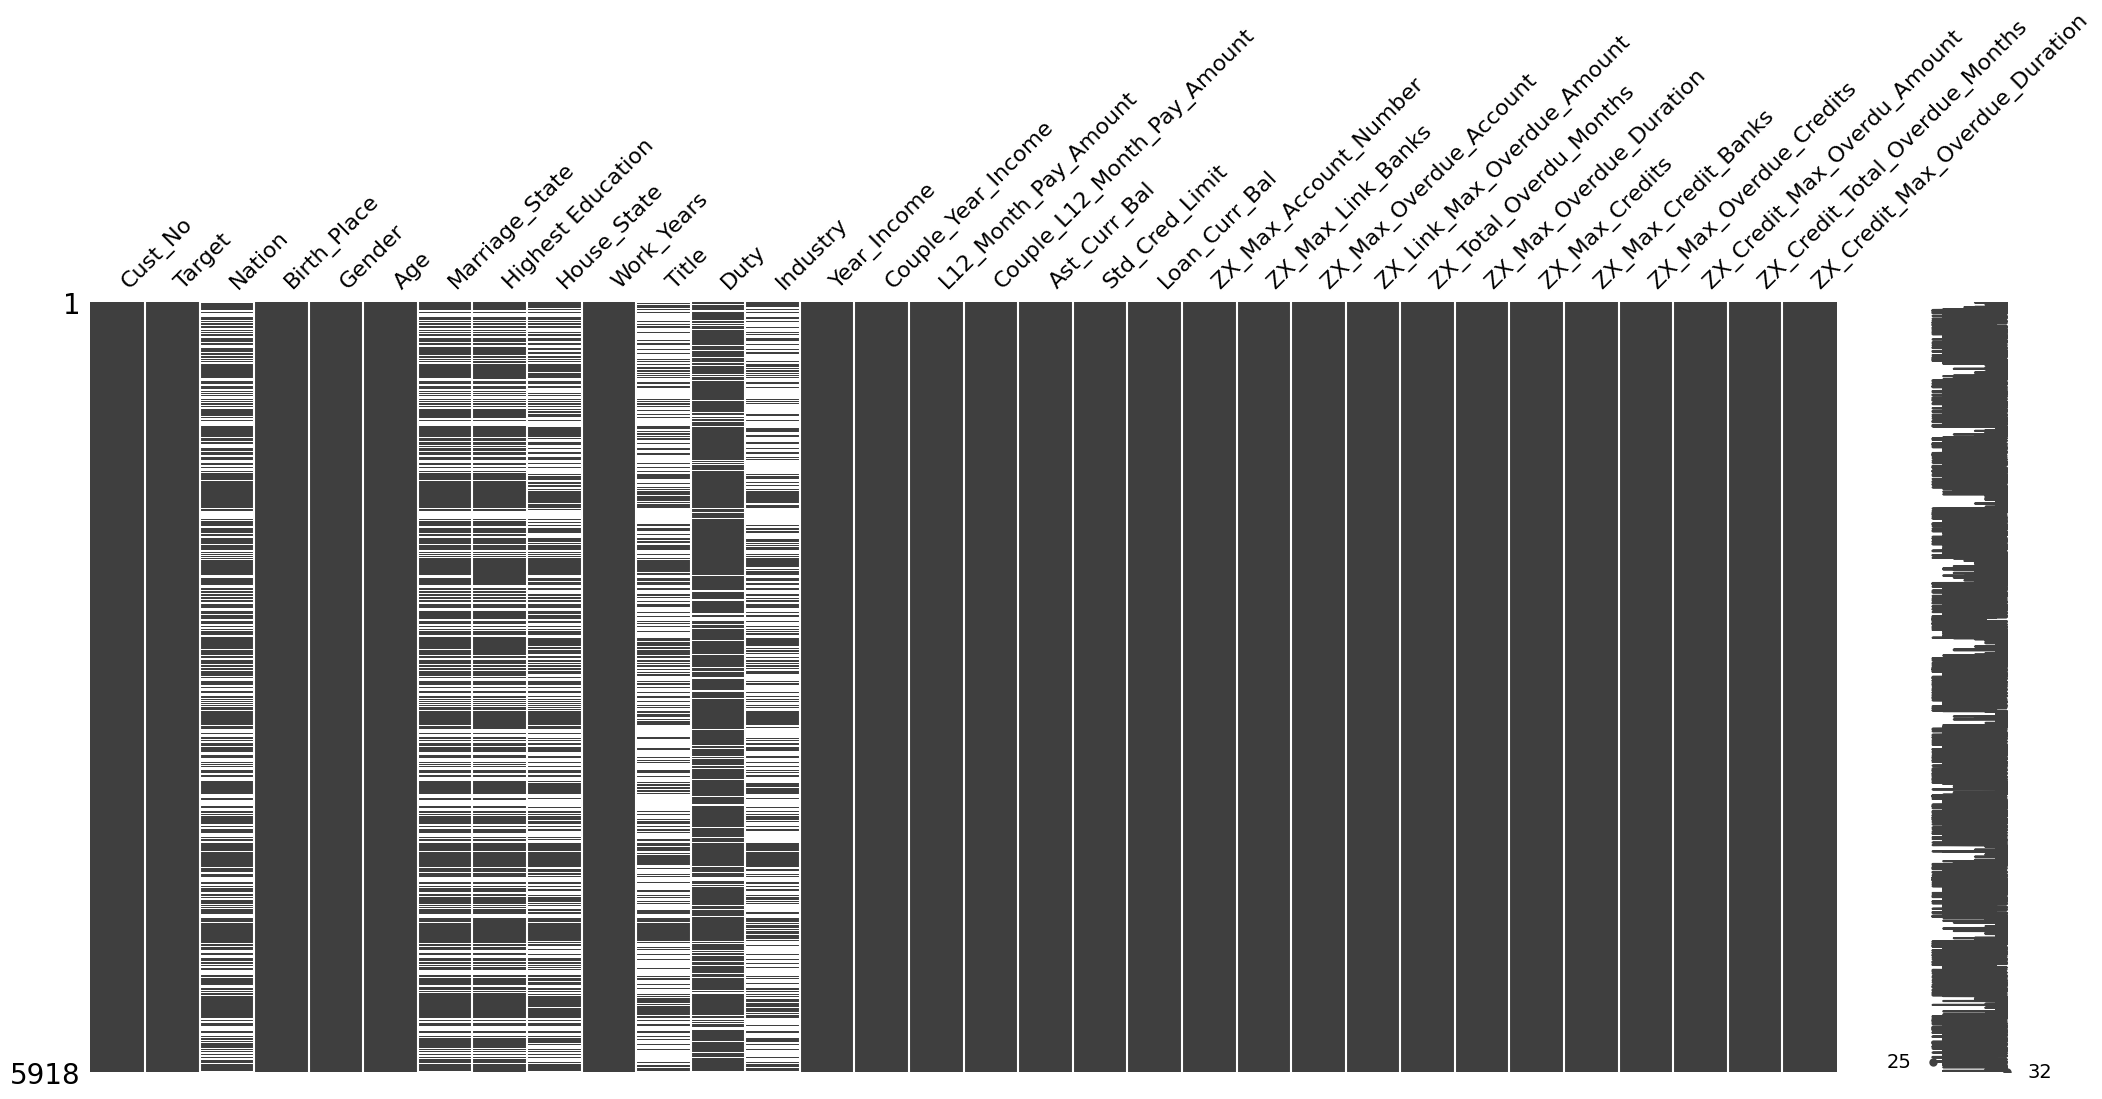

In [ ]:
import missingno as msno
# Visualize missing values using missingno
msno.matrix(data)

Missing values filled with mode:
Nation               0
Marriage_State       0
Highest Education    0
House_State          0
Title                0
Duty                 0
Industry             0
dtype: int64


<Axes: >

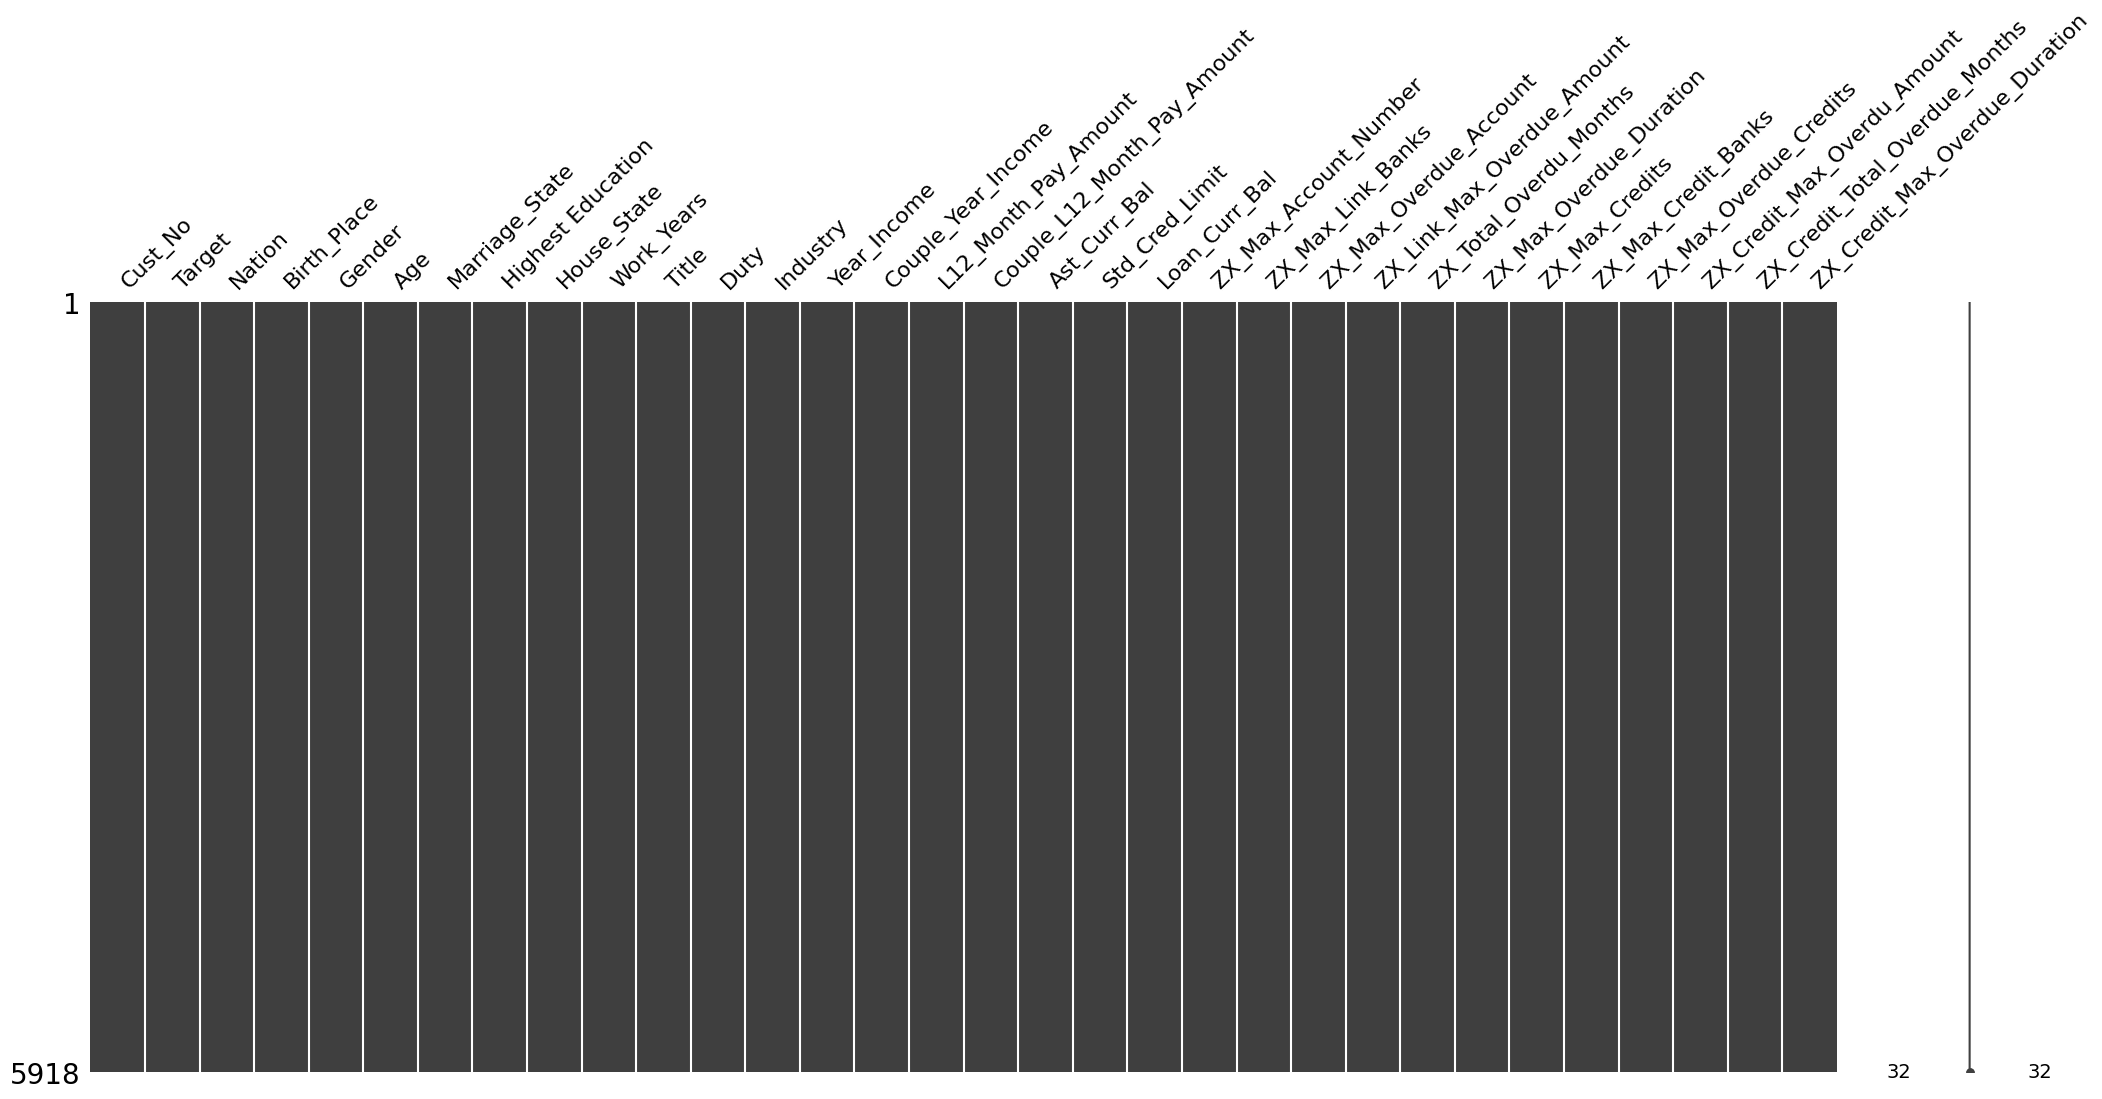

In [ ]:
# Find columns with missing values
missname = data.columns[data.isnull().sum() > 0].tolist()

# Fill missing values with the mode
for column in missname:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Verify that missing values have been filled
print("Missing values filled with mode:")
print(data[missname].isnull().sum())
msno.matrix(data)

In [ ]:
from sklearn.model_selection import train_test_split
# Remove the index column (assuming it's the first column, adjust if needed)
data = data.drop('Cust_No', axis=1)

# Define X (independent variables) and y (dependent variable)
X = data.drop(columns=['Target'])  # Replace 'Target' with the actual name of your target variable
y = data['Target']

# Split the dataset into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

# Check the shapes of the resulting sets
X_train

,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Title,Duty,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
1011,1.0,330621,1,45,20.0,90.0,1.0,0,9.0,1.0,...,2,1497,12,2,0,0,0,0,0,0
3854,1.0,330621,1,25,20.0,71.0,1.0,0,9.0,0.0,...,4,0,3,1,0,0,0,0,0,0
2145,1.0,330621,1,44,20.0,61.0,1.0,0,9.0,1.0,...,2,3446,6,1,2,2,0,0,0,0
3615,1.0,330621,1,33,20.0,71.0,1.0,0,9.0,1.0,...,0,0,0,0,0,0,0,0,0,0
763,90.0,330421,0,32,99.0,71.0,1.0,0,9.0,0.0,...,3,2735,3,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,90.0,330683,0,26,10.0,41.0,5.0,0,9.0,0.0,...,0,0,0,0,2,2,0,0,0,0
5453,1.0,330623,0,39,20.0,21.0,1.0,68629,0.0,2.0,...,0,0,0,0,2,2,0,0,0,0
5183,1.0,330621,1,37,20.0,71.0,1.0,0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1201,1.0,330621,1,32,20.0,71.0,1.0,0,9.0,0.0,...,0,0,0,0,2,2,0,0,0,0


In [ ]:
X_test

,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Title,Duty,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
833,1.0,330781,1,34,10.0,21.0,1.0,68625,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
138,1.0,330421,0,27,20.0,71.0,1.0,0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
262,90.0,331081,1,34,99.0,71.0,1.0,68621,9.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1492,1.0,330621,1,32,20.0,71.0,1.0,0,9.0,1.0,...,1,33,4,1,2,2,0,0,0,0
5869,1.0,330621,0,37,20.0,90.0,1.0,0,9.0,9.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1.0,330621,1,32,20.0,31.0,1.0,0,9.0,1.0,...,2,80,4,3,0,0,0,0,0,0
3973,90.0,330621,1,60,20.0,71.0,1.0,0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
647,1.0,330621,1,40,20.0,71.0,1.0,0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4299,1.0,330621,0,44,20.0,71.0,1.0,0,9.0,1.0,...,1,0,6,1,1,1,0,0,0,0


In [ ]:
y_train

1011    0
3854    0
2145    0
3615    0
763     0
       ..
800     0
5453    0
5183    0
1201    0
2360    0
Name: Target, Length: 5326, dtype: int64

In [ ]:
y_test

833     0
138     0
262     0
1492    0
5869    0
       ..
3444    0
3973    0
647     0
4299    0
3078    0
Name: Target, Length: 592, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()

# Fit on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
# Check the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y_train))

# Apply oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_train_fix, y_train_fix = oversampler.fit_resample(X_train_scaled, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_fix))

Class distribution before oversampling: Counter({0: 5219, 1: 107})
Class distribution after oversampling: Counter({0: 5219, 1: 5219})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Declare the logistic regression algorithm
logistic_reg = LogisticRegression(max_iter=500)

# Define hyperparameters for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Optimization methods
}

# Create the grid search object
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5)

# Perform grid search and cross-validation
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'C': 0.001, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.9799099789481103


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Declare the logistic regression algorithm
logistic_reg = LogisticRegression(max_iter=500, C=1, solver='lbfgs')  # Use the optimal parameters

# Fit the model on the training data
logistic_reg.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = logistic_reg.predict(X_train_scaled)

# Predict on the test set
y_test_pred = logistic_reg.predict(X_test_scaled)

# Evaluate performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, logistic_reg.predict_proba(X_train_scaled)[:, 1])

# Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, logistic_reg.predict_proba(X_test_scaled)[:, 1])

# Output performance data
print("Performance on Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("ROC AUC Score:", train_roc_auc)

print("\nPerformance on Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("ROC AUC Score:", test_roc_auc)

Performance on Training Set:
Accuracy: 0.9795343597446489
Precision: 0.0
Recall: 0.0
ROC AUC Score: 0.7434678824496403

Performance on Test Set:
Accuracy: 0.9831081081081081
Precision: 0.0
Recall: 0.0
ROC AUC Score: 0.7366113969887554


In [ ]:
import joblib

# Save the trained model to a file with a .pkl extension
model_filename = 'logistic_regression_model.pkl'
joblib.dump(logistic_reg, model_filename)

# You can now share or store the model using the saved file.

['logistic_regression_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load(model_filename)

# Now you can use the loaded_model for predictions
new_data = X_test_scaled[0:1]  # Example: Get the first row of test data
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0]
